In [1]:
import glob
import cv2
from PIL import Image
import os
import json
from matplotlib import pyplot as plt
import math
import numpy as np

In [2]:
#Malignent Images
path = "Ultrasound-labeled/malignant/"
dir_list = [f for f in os.listdir(path) if not f.startswith('.')]

Tumor_list_malignant = []
cropped_images_malignant = []

diff1 = []
diff2 = []

for id in dir_list:
    output_path1 = r'Ultrasound-labeled/malignant/'+id+'/*.jpg'
    
    images = []
    labels = []
   
    for file in glob.glob(output_path1):
        images.append(cv2.imread(file))
        output_path2 = file[:-4]+'.json'
        with open(output_path2) as json_file:
            label = json.load(json_file)
        labels.append(label)
        
        position = label['shapes'][0]['points']
        pos1 = math.floor(position[0][1])
        pos2 = math.ceil(position[1][1])
        pos3 = math.floor(position[0][0])
        pos4 = math.ceil(position[1][0])
    
        d1 = pos2-pos1
        d2 = pos4-pos3
        
        n1 = int(275 - d1/2)
        n2 = int(275 + d1/2)
        
        n3 = int(353 - d2/2)
        n4 = int(353 + d2/2)
        
        padded_image = np.zeros((549, 705, 3), np.uint8)
        padded_image[n1:n2, n3:n4, :] = cv2.imread(file)[pos1:pos2, pos3:pos4,:]
        
        cropped_images_malignant.append(padded_image)
        
        diff1.append(pos2-pos1) # maximum difference is 549
        diff2.append(pos4-pos3) # maximum difference is 705
    
    Tumor = {'Type': 'Malignant', 'Patient': {'id': id, 'Image': images, 'Tumor_Label':  labels[0]['shapes'][0]['points']}}
    Tumor_list_malignant.append(Tumor)

#Benign Images

path = "Ultrasound-labeled/benign/"
dir_list = [f for f in os.listdir(path) if not f.startswith('.')]

Tumor_list_benign = []
cropped_images_benign = []

for id in dir_list:
    output_path1 = r'Ultrasound-labeled/benign/'+id+'/*.jpg'
    
    images = []
    labels = []
    
    for file in glob.glob(output_path1):
        images.append(cv2.imread(file))
        output_path2 = file[:-4]+'.json'
        with open(output_path2) as json_file:
            label = json.load(json_file)
        labels.append(label)
        
        position = label['shapes'][0]['points']
        pos1 = math.floor(position[0][1])
        pos2 = math.ceil(position[1][1])
        pos3 = math.floor(position[0][0])
        pos4 = math.ceil(position[1][0])
        
        d1 = pos2-pos1
        d2 = pos4-pos3
        
        n1 = int(275 - d1/2)
        n2 = int(275 + d1/2)
        
        n3 = int(353 - d2/2)
        n4 = int(353 + d2/2)
        
        padded_image = np.zeros((549, 705, 3), np.uint8)
        padded_image[n1:n2, n3:n4, :] = cv2.imread(file)[pos1:pos2, pos3:pos4,:]
        
        cropped_images_benign.append(padded_image)
        
        diff1.append(pos2-pos1) # maximum difference is 549
        diff2.append(pos4-pos3) # maximum difference is 705
    
    Tumor = {'Type': 'Benign', 'Patient': {'id': id, 'Image': images, 'Tumor_Label':  labels[0]['shapes'][0]['points']}}
    Tumor_list_benign.append(Tumor)

In [3]:
len(cropped_images_malignant)

487

In [4]:
len(cropped_images_benign)

663

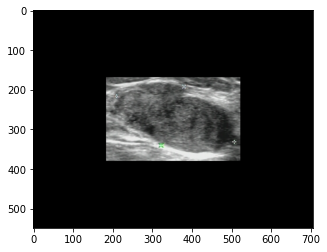

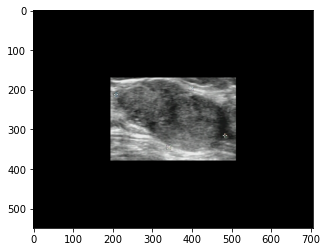

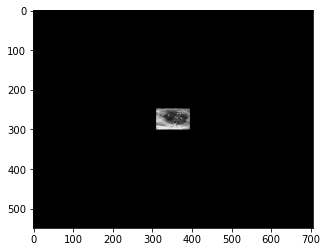

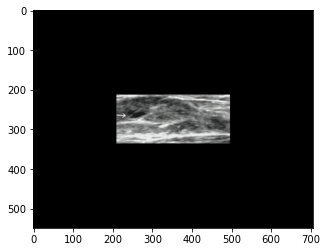

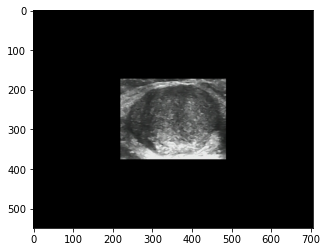

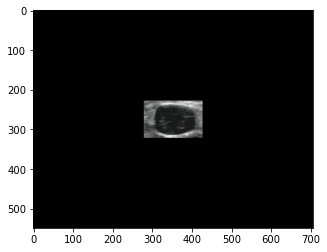

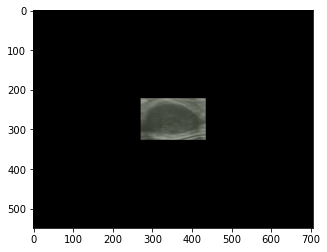

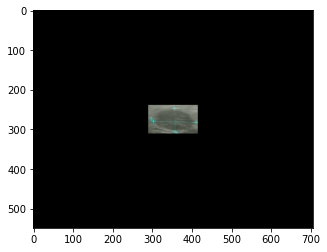

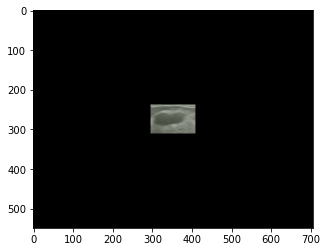

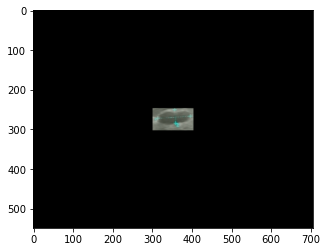

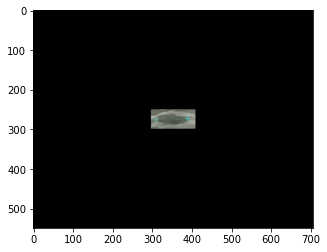

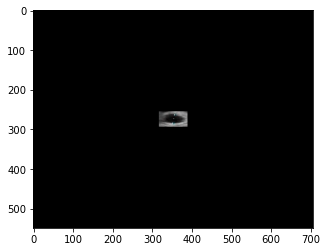

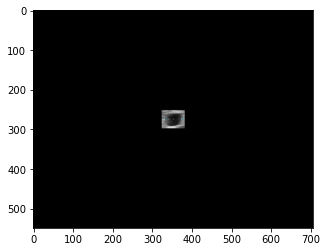

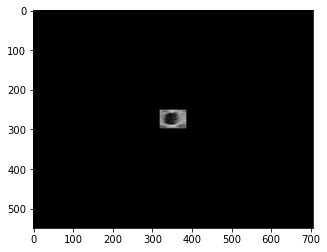

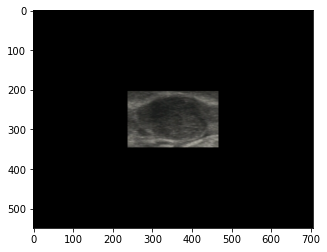

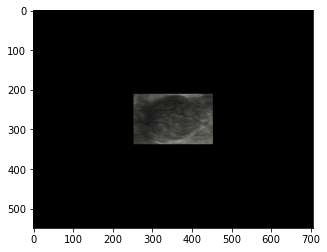

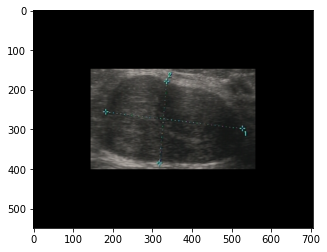

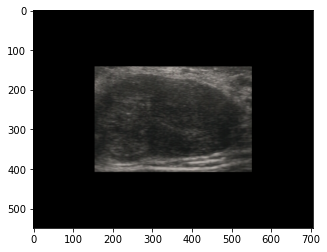

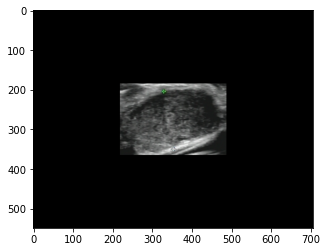

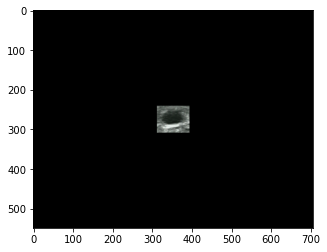

In [5]:
for k in range(20):
    x = cropped_images_benign[30 + k]
    img = Image.fromarray(x)
    plt.imshow(img, cmap="gray") 
    plt.show() 

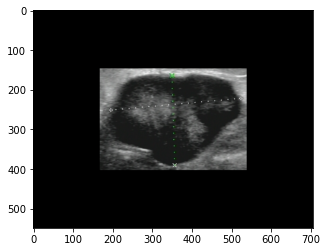

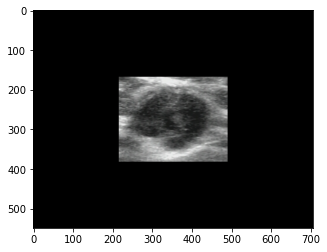

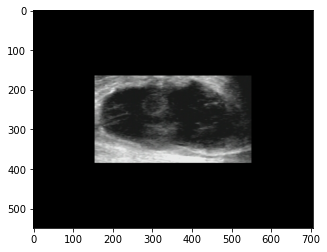

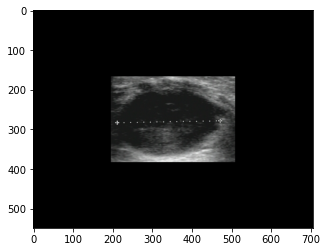

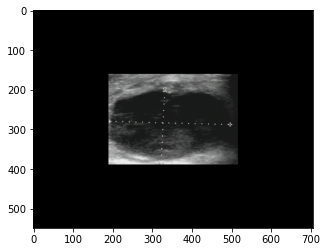

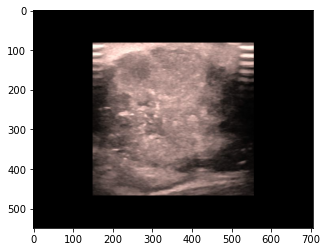

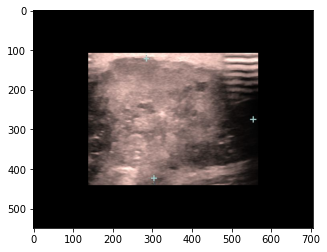

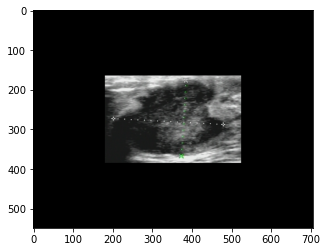

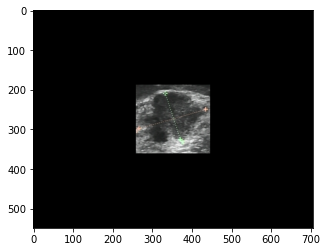

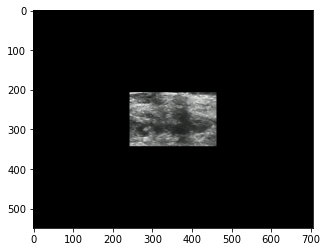

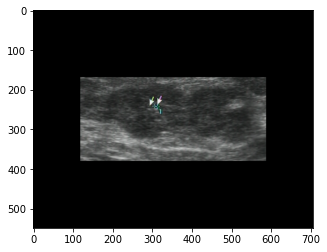

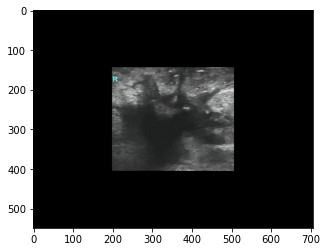

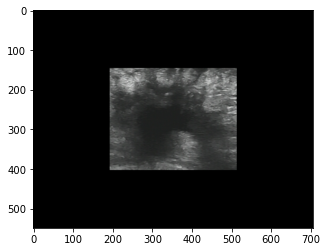

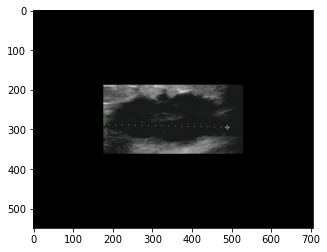

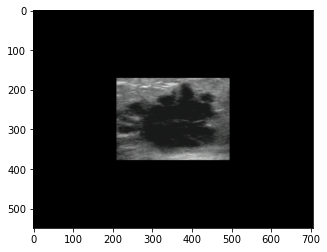

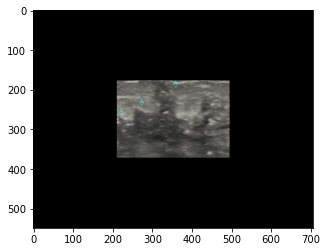

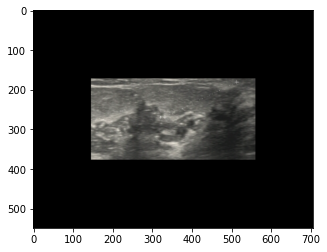

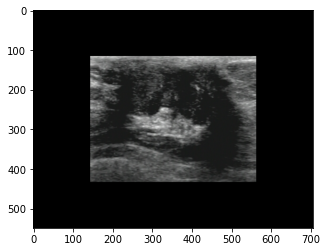

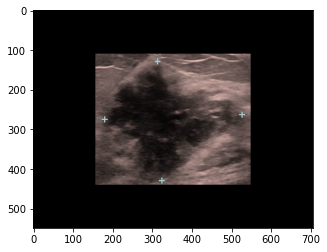

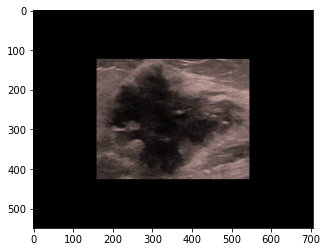

In [6]:
for k in range(20):
    x = cropped_images_malignant[15 + k]
    img = Image.fromarray(x)
    plt.imshow(img, cmap="gray") 
    plt.show() 

# Save Cropped Malignant Images as jpeg Files

In [7]:
#for k in range(len(cropped_images_malignant)):
 #   cv2.imwrite(r'im'+str(k)+'.jpeg',cropped_images_malignant[k])

# Save Cropped Benign Images as jpeg Files

In [8]:
#for k in range(len(cropped_images_benign)):
    #cv2.imwrite(r'im'+str(k)+'.jpeg',cropped_images_benign[k])